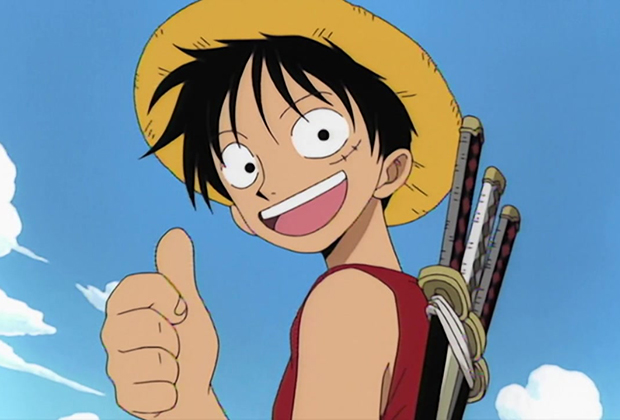

In [1]:
#=
Pixel art generator (suggested implementation: any programming language you want to master). 
Build a tool that takes an image as input and samples the image to produce pixel art as output. 
If you want to improve your front-end skills, generate the resulting pixel art using CSS.
=#

using LinearAlgebra
using SparseArrays
using Images
using TestImages
using Colors

before_photo = load("C:/Users/kgtrm/Desktop/Files/Pictures/julia_thing/op.jpg")

In [3]:
function factors(number)
    factor_list = Int[]
    for i in 1:Int(floor(sqrt(number)))
        if (number % i == 0)
            push!(factor_list, i)
        end
    end
    return factor_list
end

scale_factors = intersect(factors(size(before_photo)[1]), factors(size(before_photo)[2]))

new_dimensions = Tuple{Float64, Float64}[]
for i in scale_factors
    push!(new_dimensions, (size(before_photo)[1] / i, size(before_photo)[2] / i))
end
;

@show scale_factors
@show new_dimensions  
;

scale_factors = [1, 2, 4, 5, 10, 20]
new_dimensions = [(420.0, 620.0), (210.0, 310.0), (105.0, 155.0), (84.0, 124.0), (42.0, 62.0), (21.0, 31.0)]


typeof(new_picture) = Matrix{RGB{N0f8}}
size(new_picture) = (21, 31)


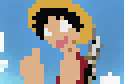

In [9]:
scale_by = 20

orig_r = size(before_photo)[1]
orig_c = size(before_photo)[2]

rows = Int(orig_r / scale_by)
columns = Int(orig_c / scale_by)

sub_dim_x = Int(floor(orig_r / rows))
sub_dim_y = Int(floor(orig_c / columns))

submatrices = Matrix{RGB{N0f8}}[]
for i in 1:rows
    for j in 1:columns
        submatrix = copy(before_photo[max(Int((i - 1) * orig_r / rows), 1) : Int((i) * orig_r / rows), max(Int((j - 1) * orig_c / columns),1) : Int((j) * orig_c / columns)])
        push!(submatrices, submatrix)
    end
end   

function max_dict(dictionary)
    max = 0
    current_key = 1
    for key in keys(dictionary)
        if (dictionary[key] > max)
            max = dictionary[key]
            current_key = key
        end
    end
    return current_key
end


function mode(matrix)
    item_count_dict = Dict()
    for i in matrix
        try
            item_count_dict[i] += 1
        catch
            item_count_dict[i] = 0
        end
    end
    return max_dict(item_count_dict)
end

new_submatrices = RGB{N0f8}[]
for i in 1:length(submatrices)
    push!(new_submatrices, mode(submatrices[i]))
end

length(new_submatrices)

new_picture = copy(reshape(new_submatrices, (columns, rows))')

@show typeof(new_picture)
@show size(new_picture)
new_picture

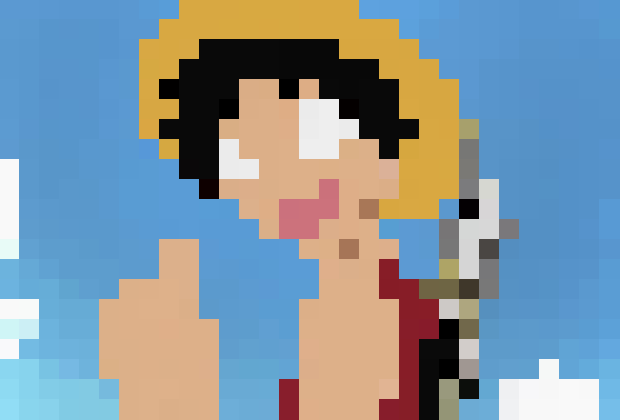

In [10]:
scaled_pixel = similar(before_photo)

for i in 1:size(new_picture)[1]
    k = max(Int((i - 1) * orig_r / rows), 1)
    for j in 1:size(new_picture)[2]
        h = max(Int((j - 1) * orig_c / columns), 1)
        pixel = new_picture[i,j]
        for k_index in k:(k + scale_by)
            for h_index in h:(h + scale_by)
                scaled_pixel[k_index, h_index] = new_picture[i,j]
                #[max(Int((i - 1) * orig_r / rows), 1) : Int((i) * orig_r / rows), max(Int((j - 1) * orig_c / columns),1) : Int((j) * orig_c / columns)])
            end
        end
    end
end  

save("C:/Users/kgtrm/Desktop/Files/Pictures/julia_thing/oppixel.jpg", scaled_pixel);
scaled_pixel